## Comparison of Lasso Factorial Selection with Forward Selection

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from factorial_model import FactorialModel
from forward_selection import ForwardSelection
from evaluate import *

### Initialize factorial model

In [3]:
# CHOOSE K AND DEGREE
fm = FactorialModel(
    n=1000,
    k=4,
    degree=4,
    sigma=0.1,
    sparsity=0.5,
    contrast_coding=True,
    beta_seed=0,
)

In [4]:
# CHOOSE ONE BETA SAMPLING METHOD (1 = normal, 2 = skewed, 3 = cluster)
sample_beta(fm, sampling_method=3, min_degree=2)
true_beta = fm.beta
beta_mask = fm.pf.fit_transform(fm.pf.powers_)
true_expected_outcomes = beta_mask @ true_beta

In [5]:
# Evaluate two models for NUM_TRIALS
NUM_TRIALS = 30
lasso_mses, fs_mses, lasso_r2s, fs_r2s, lasso_betas, fs_betas, \
    lasso_expected_outcomes, fs_expected_outcomes = evaluate(fm, NUM_TRIALS)

avg_lasso_betas = np.mean(lasso_betas, axis=0)
avg_fs_betas = np.mean(fs_betas, axis=0)
avg_lasso_expected_outcomes = np.mean(lasso_expected_outcomes, axis=0)
avg_fs_expected_outcomes = np.mean(fs_expected_outcomes, axis=0)

In [6]:
# MSE comparison
avg_lasso_mse = np.mean(np.array(lasso_mses))
avg_fs_mses = np.mean(np.array(fs_mses))
std_lasso_mse = np.std(np.array(lasso_mses))
std_fs_mses = np.std(np.array(fs_mses))
print(f"Lasso MSE: {avg_lasso_mse} +/- {std_lasso_mse}")
print(f"Forward Selection MSE: {avg_fs_mses} +/- {std_fs_mses}")

Lasso MSE: 0.009953230276365804 +/- 0.000897301758246233
Forward Selection MSE: 0.24128338339278202 +/- 0.006992952588751689


In [7]:
# R2 comparison
avg_lasso_r2 = np.mean(np.array(lasso_r2s))
avg_fs_r2 = np.mean(np.array(fs_r2s))
std_lasso_r2 = np.std(np.array(lasso_r2s))
std_fs_r2 = np.std(np.array(fs_r2s))
print(f"Lasso R2: {avg_lasso_r2} +/- {std_lasso_r2}")
print(f"Forward Selection R2: {avg_fs_r2} +/- {std_fs_r2}")

Lasso R2: 0.9897608191543902 +/- 0.0006348930345288609
Forward Selection R2: 0.7604910899992615 +/- 0.006710334687709575


In [8]:
# Beta comparison
lasso_beta_ztest_pvals = [ztest(lasso_beta, true_beta)[1] for lasso_beta in lasso_betas]
fs_beta_ztest_pvals = [ztest(fs_beta, true_beta)[1] for fs_beta in fs_betas]
avg_lasso_beta_ztest_pval = np.mean(np.array(lasso_beta_ztest_pvals))
avg_fs_beta_ztest_pval = np.mean(np.array(fs_beta_ztest_pvals))
print(f"Lasso beta Z-test: {avg_lasso_beta_ztest_pval}")
print(f"Forward Selection beta Z-test: {avg_fs_beta_ztest_pval}")

Lasso beta Z-test: 0.994456704835031
Forward Selection beta Z-test: 0.7137075214398971


In [9]:
# Expected outcomes comparison
lasso_outcomes_ztest_pvals = [ztest(lasso_outcome, true_expected_outcomes)[1] for lasso_outcome in lasso_expected_outcomes]
fs_outcomes_ztest_pvals = [ztest(fs_outcome, true_expected_outcomes)[1] for fs_outcome in fs_expected_outcomes]
avg_lasso_outcomes_ztest_pval = np.mean(np.array(lasso_outcomes_ztest_pvals))
avg_fs_outcomes_ztest_pval = np.mean(np.array(fs_outcomes_ztest_pvals))
print(f"Lasso expected outcomes Z-test: {avg_lasso_outcomes_ztest_pval}")
print(f"Forward Selection expected outcomes Z-test: {avg_fs_outcomes_ztest_pval}")

Lasso expected outcomes Z-test: 0.9781216996652852
Forward Selection expected outcomes Z-test: 0.5083238491779812


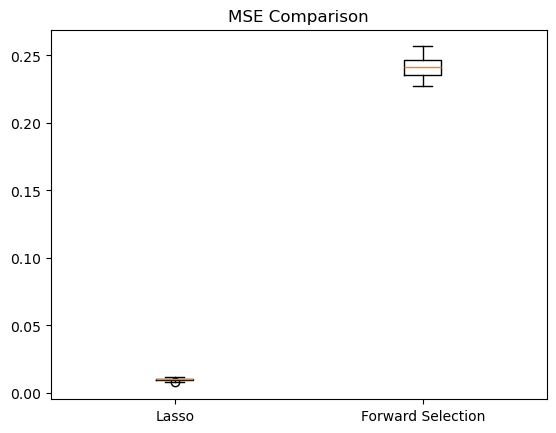

In [10]:
# Plot MSE boxplot
plt.figure()
plt.boxplot([lasso_mses, fs_mses], labels=["Lasso", "Forward Selection"])
plt.title("MSE Comparison")
plt.show()

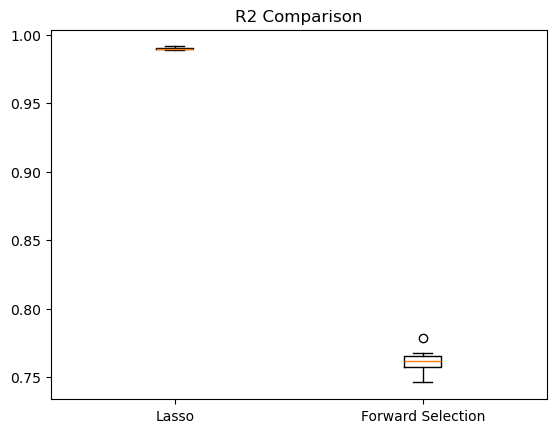

In [11]:
# Plot R2 boxplot
plt.figure()
plt.boxplot([lasso_r2s, fs_r2s])
plt.xticks([1, 2], ["Lasso", "Forward Selection"])
plt.title("R2 Comparison")
plt.show()

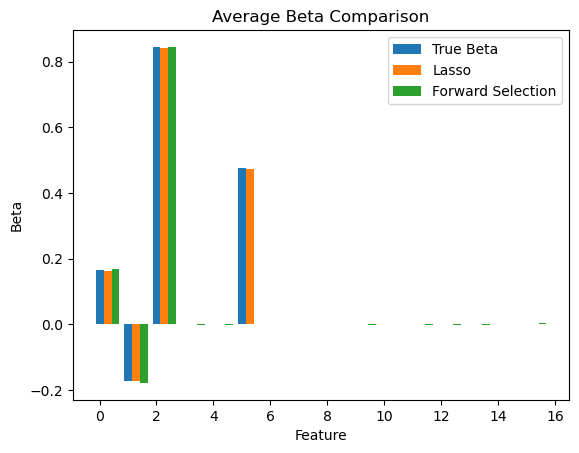

In [12]:
# Plot average betas for Lasso and Forward Selection against true beta
plt.figure()
bar_width = 0.28
index = np.arange(len(avg_lasso_betas))
plt.bar(index, true_beta, bar_width, label="True Beta")
plt.bar(index + bar_width, avg_lasso_betas, bar_width, label="Lasso")
plt.bar(index + 2*bar_width, avg_fs_betas, bar_width, label="Forward Selection")
plt.xlabel("Feature")
plt.ylabel("Beta")
plt.title("Average Beta Comparison")
plt.legend()
plt.show()

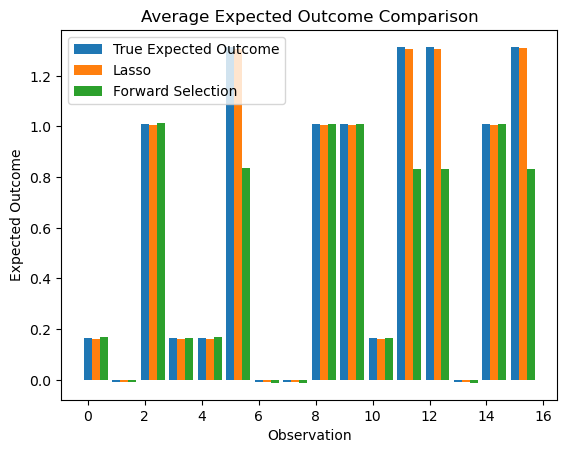

In [13]:
# Plot average expected outcomes for Lasso and Forward Selection against true expected outcomes
plt.figure()
bar_width = 0.28
index = np.arange(len(avg_lasso_expected_outcomes))
plt.bar(index, true_expected_outcomes, bar_width, label="True Expected Outcome")
plt.bar(index + bar_width, avg_lasso_expected_outcomes, bar_width, label="Lasso")
plt.bar(index + 2*bar_width, avg_fs_expected_outcomes, bar_width, label="Forward Selection")
plt.xlabel("Observation")
plt.ylabel("Expected Outcome")
plt.title("Average Expected Outcome Comparison")
plt.legend()
plt.show()

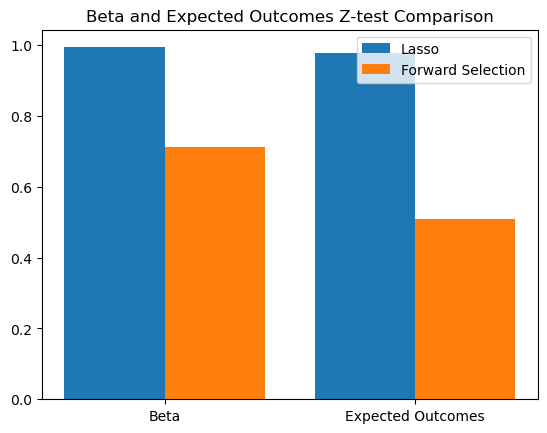

In [14]:
# Plot beta and expected outcomes Z-test p-values
x = np.arange(2)
width = 0.4

plt.figure()
plt.bar(x-0.2, [avg_lasso_beta_ztest_pval, avg_lasso_outcomes_ztest_pval], width)
plt.bar(x+0.2, [avg_fs_beta_ztest_pval, avg_fs_outcomes_ztest_pval], width)
plt.xticks(x, ["Beta", "Expected Outcomes"])
plt.title("Beta and Expected Outcomes Z-test Comparison")
plt.legend(["Lasso", "Forward Selection"])
plt.show()

## Lower bound on number of observations

- General bound (HDP 10.3.5): $n \geq s \log 2^k$
- Noisy bound (HDP 10.6.1-2): $\lVert \hat{x} - x \rVert_2 \leq C \sigma \sqrt{\frac{s \log 2^k}{n}}$

where $n$ = number of observations, $s$ = number of nonzero coefficients (sparse_count), and $k$ = number of treatments, and $\sigma = \lVert w \rVert_2 / \sqrt{n}$.  Thus we have $n \geq \sigma^2 \cdot s \log 2^k$

In [15]:
num_treatments = 8
num_coeffs = 2 ** num_treatments
percent_sparsity = 0.5
sparse_count = (1 - percent_sparsity) * num_coeffs
general_bound = sparse_count * np.log(num_coeffs)

In [16]:
# Compute noisy bound
fm = FactorialModel(
    n=int(general_bound),
    k=num_treatments,
    degree=num_treatments,
    sigma=0.1,
    sparsity=percent_sparsity,
    contrast_coding=True,
    beta_seed=0,
)

sample_beta(fm, sampling_method=1, min_degree=2)
fm.sample_and_split_data(seed=0)

w_norm = np.linalg.norm(fm.eps)
sigma_sq = w_norm ** 2 / fm.n
noisy_bound = sigma_sq * general_bound

In [17]:
print(f'w_norm: {w_norm}, sigma_sq: {sigma_sq}, general_bound: {general_bound}, noisy_bound: {noisy_bound}')

w_norm: 2.6772822686114206, sigma_sq: 0.010109788922173646, general_bound: 709.782712893384, noisy_bound: 7.175753407959891


In [18]:
num_observations = np.arange(20, 2001, 20)
mse_over_num_obs = []

for n in num_observations:
    fm = FactorialModel(
        n=n,
        k=num_treatments,
        degree=num_treatments,
        sigma=0.1,
        sparsity=percent_sparsity,
        contrast_coding=True,
        beta_seed=0,
    )

    sample_beta(fm, sampling_method=3, min_degree=2)
    fm.sample_and_split_data(seed=0)
    evaluate_lasso(fm)
    mse_over_num_obs.append(fm.mse)

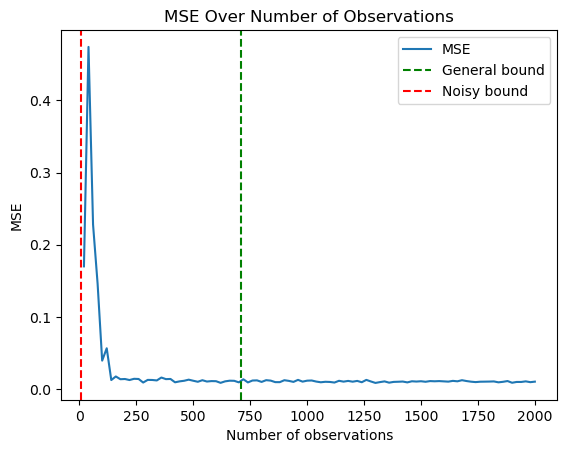

In [19]:
# Plot the results
plt.plot(num_observations, mse_over_num_obs, label="MSE")
plt.axvline(general_bound, color="green", linestyle="--", label="General bound")
plt.axvline(noisy_bound, color="red", linestyle="--", label="Noisy bound")
plt.xlabel("Number of observations")
plt.ylabel("MSE")
plt.title("MSE Over Number of Observations")
plt.legend()
plt.show()